## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

In [2]:
dataset = pd.read_csv('crop_yield.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [4]:
to_drop = ['Crop','Season','State']
dataset.drop(to_drop, inplace=True, axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Area'] = label_encoder.fit_transform(dataset['Area'])
dataset['Annual_Rainfall'] = label_encoder.fit_transform(dataset['Annual_Rainfall'])
dataset['Fertilizer'] = label_encoder.fit_transform(dataset['Fertilizer'])
dataset['Pesticide'] = label_encoder.fit_transform(dataset['Fertilizer'])
dataset['Yield'] = label_encoder.fit_transform(dataset['Yield'])
dataset

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,8801,56708,473,12858,12858,4190
1,1997,3730,4685,473,6969,6969,3655
2,1997,772,22,473,2478,2478,564
3,1997,6105,126905000,473,9861,9861,13413
4,1997,1517,794,473,3847,3847,1711
...,...,...,...,...,...,...,...
19684,1998,2756,2000,376,5767,5767,2200
19685,1998,950,3000,376,2891,2891,9774
19686,1997,11450,440900,335,15810,15810,6571
19687,1997,11243,5488,335,15609,15609,2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Crop_Year        19689 non-null  int64
 1   Area             19689 non-null  int64
 2   Production       19689 non-null  int64
 3   Annual_Rainfall  19689 non-null  int64
 4   Fertilizer       19689 non-null  int64
 5   Pesticide        19689 non-null  int64
 6   Yield            19689 non-null  int64
dtypes: int64(7)
memory usage: 1.1 MB


In [7]:
X = dataset.iloc[:, [2,4]].values
y = dataset.iloc[:, 0].values

In [8]:
y

array([1997, 1997, 1997, ..., 1997, 1997, 1997], dtype=int64)

In [9]:
X

array([[ 56708,  12858],
       [  4685,   6969],
       [    22,   2478],
       ...,
       [440900,  15810],
       [  5488,  15609],
       [392160,  15369]], dtype=int64)

## Split Dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [11]:
X_test

array([[271845,   6223],
       [ 29339,   7777],
       [  5374,   7848],
       ...,
       [   206,   1965],
       [ 31046,  12093],
       [ 18783,   7202]], dtype=int64)

In [12]:
y_test

array([2010, 2015, 1999, ..., 2019, 2018, 2003], dtype=int64)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[-0.06443568, -1.60769823],
       [-0.04714397,  1.71800388],
       [-0.06441686, -0.03888177],
       ...,
       [-0.06440256, -0.38688237],
       [-0.06443546, -1.43142876],
       [-0.06435506,  0.67509129]])

In [15]:
y_test

array([2010, 2015, 1999, ..., 2019, 2018, 2003], dtype=int64)

## Training Naive Bayes Use Training Set

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
#Data harus bernilai int untuk menjalankan Gaussian
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting Test

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([2020, 2020, 2020, ..., 2020, 2020, 2020], dtype=int64)

In [19]:
y_test

array([2010, 2015, 1999, ..., 2019, 2018, 2003], dtype=int64)

## Confussion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 38   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   1   0   0   0 121]
 [ 41   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    1   1   0   0   0 196]
 [ 59   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 221]
 [ 55   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    1   1   1   0   0 259]
 [ 53   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    2   1   0   0   0 247]
 [ 49   0   0   0   0   0   0   0   0   0   0   2   1   0   0   0   0   0
    1   0   1   0   0 261]
 [ 66   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    2   0   0   0   0 266]
 [ 65   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   1   1   0   0 246]
 [ 58   0   0   0   0   0   0   0   0   0   0   2   1   0   0   0   0   0
    1   1   0   0   0 259]
 [ 52   0   0   0   0   0   0   0   0   0   0   2   1   0   0   0   0   0
    1   1   0   0

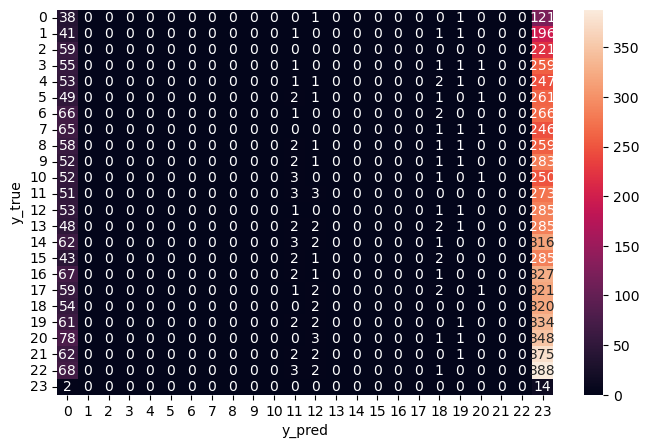

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [22]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1997       0.03      0.24      0.05       161
        1998       0.00      0.00      0.00       240
        1999       0.00      0.00      0.00       280
        2000       0.00      0.00      0.00       318
        2001       0.00      0.00      0.00       305
        2002       0.00      0.00      0.00       315
        2003       0.00      0.00      0.00       335
        2004       0.00      0.00      0.00       314
        2005       0.00      0.00      0.00       322
        2006       0.00      0.00      0.00       340
        2007       0.00      0.00      0.00       307
        2008       0.09      0.01      0.02       330
        2009       0.00      0.00      0.00       341
        2010       0.00      0.00      0.00       340
        2011       0.00      0.00      0.00       384
        2012       0.00      0.00      0.00       333
        2013       0.00      0.00      0.00       398
        2014       0.00    

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()